<a href="https://colab.research.google.com/github/HabibAlQodri/Playbook_QtCreator/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Linear Regression

## Import Model Python


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
file_path = "dataset_putus_SD_jumlah_penduduk.csv"
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML AI /dataset_putus_SD_jumlah_penduduk.csv")

In [47]:
print("Informasi Dataset:")
print(df.info())
print("\nDeskripsi Statistik:")
print(df.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Provinsi         34 non-null     object 
 1   Jumlah           34 non-null     float64
 2   Jumlah Penduduk  35 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 972.0+ bytes
None

Deskripsi Statistik:
            Jumlah  Jumlah Penduduk
count    34.000000     3.500000e+01
mean   1152.647059     1.592550e+07
std    1123.003518     4.713031e+07
min      99.000000     7.300000e+05
25%     522.000000     2.417050e+06
50%     754.000000     4.404300e+06
75%    1321.000000     9.028750e+06
max    5272.000000     2.786962e+08


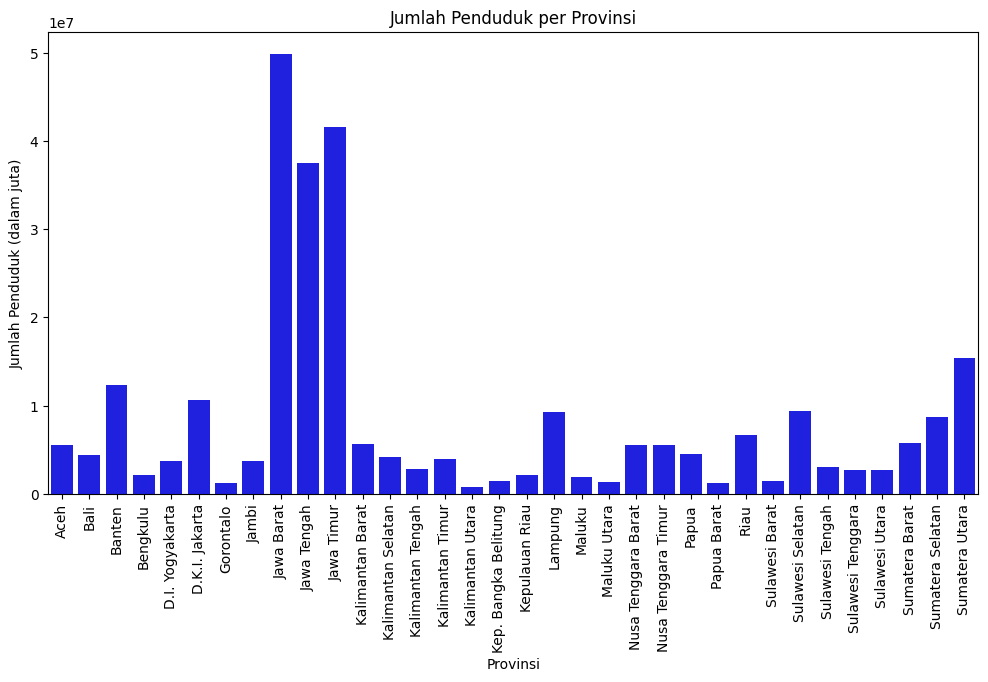

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df["Provinsi"], y=df["Jumlah Penduduk"], color='blue')
plt.xticks(rotation=90)
plt.xlabel("Provinsi")
plt.ylabel("Jumlah Penduduk (dalam juta)")
plt.title("Jumlah Penduduk per Provinsi")
plt.show()

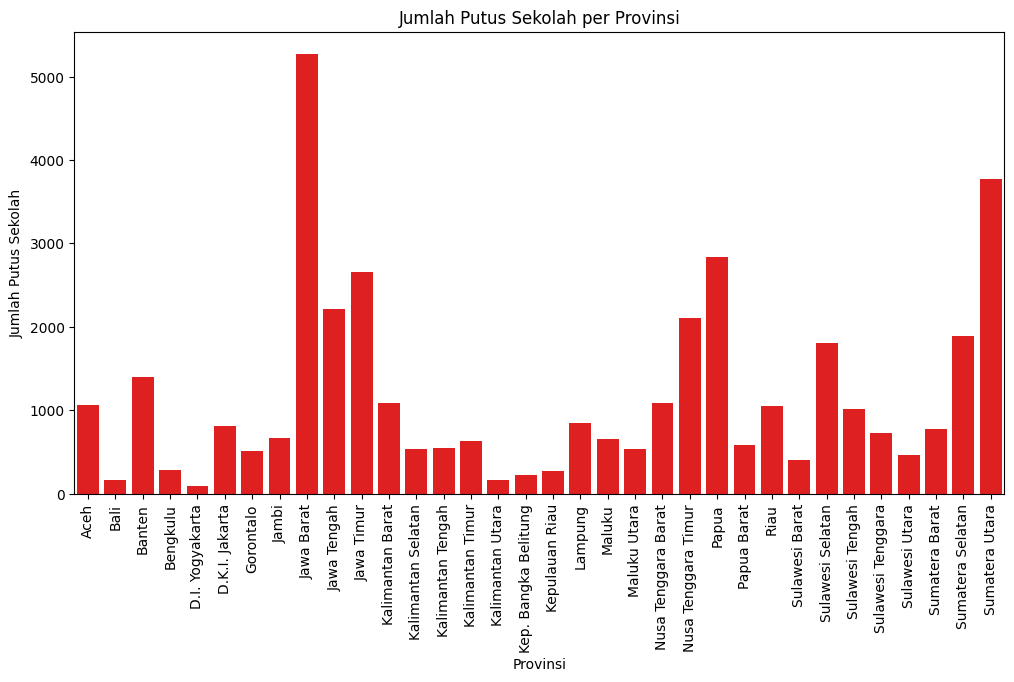

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df["Provinsi"], y=df["Jumlah"], color='red')
plt.xticks(rotation=90)
plt.xlabel("Provinsi")
plt.ylabel("Jumlah Putus Sekolah")
plt.title("Jumlah Putus Sekolah per Provinsi")
plt.show()

## Memisahkan antara data Depedensi (Y) independen (X)

In [22]:
df_clean = df.dropna(subset=["Jumlah"])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Provinsi         34 non-null     object 
 1   Jumlah           34 non-null     float64
 2   Jumlah Penduduk  35 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 972.0+ bytes


In [24]:
df.describe()

,Jumlah,Jumlah Penduduk
count,34.000000,3.500000e+01
mean,1152.647059,1.592550e+07
std,1123.003518,4.713031e+07
min,99.000000,7.300000e+05
25%,522.000000,2.417050e+06
50%,754.000000,4.404300e+06
75%,1321.000000,9.028750e+06
max,5272.000000,2.786962e+08


In [45]:
X = df_clean[["Jumlah Penduduk"]]
y = df_clean["Jumlah"]

## Membuat Model Linear Regregssion

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Melatih Model

In [31]:
y_pred = model.predict(X_test)

## Evaluasi Model

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

## Menampilkan Hasil Model

In [65]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Koefisien regresi: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Mean Absolute Error (MAE): 517.8402888500976
Root Mean Squared Error (RMSE): 757.7539113222392
Koefisien regresi: 5.7018332948913044e-05
Intercept: 641.4184618748602


## Fungsi Prediksi Model

In [63]:
def predict_putus_sekolah(jumlah_penduduk):
    return model.predict([[jumlah_penduduk]])[0]

## Implementasi Model Prediksi

In [66]:
while True:
    try:
        jumlah_penduduk_input = float(input("Masukkan jumlah penduduk (atau ketik -1 untuk keluar): "))
        if jumlah_penduduk_input == -1:
            break
        prediksi = predict_putus_sekolah(jumlah_penduduk_input)
        persen_prediksi = (prediksi / jumlah_penduduk_input) * 100 if jumlah_penduduk_input != 0 else 0
        print(f"Prediksi jumlah putus sekolah untuk {jumlah_penduduk_input} penduduk: {prediksi} ({persen_prediksi:.2f}%)")
    except ValueError:
        print("Harap masukkan angka yang valid.")

Masukkan jumlah penduduk (atau ketik -1 untuk keluar): 100000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Prediksi jumlah putus sekolah untuk 100000.0 penduduk: 647.1202951697516 (0.65%)
Masukkan jumlah penduduk (atau ketik -1 untuk keluar): 1000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Prediksi jumlah putus sekolah untuk 1000000.0 penduduk: 698.4367948237732 (0.07%)
Masukkan jumlah penduduk (atau ketik -1 untuk keluar): 5000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Prediksi jumlah putus sekolah untuk 5000000.0 penduduk: 926.5101266194254 (0.02%)
Masukkan jumlah penduduk (atau ketik -1 untuk keluar): 6500000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Prediksi jumlah putus sekolah untuk 6500000.0 penduduk: 1012.037626042795 (0.02%)
Masukkan jumlah penduduk (atau ketik -1 untuk keluar): -1


## Diagram Ilustrasi

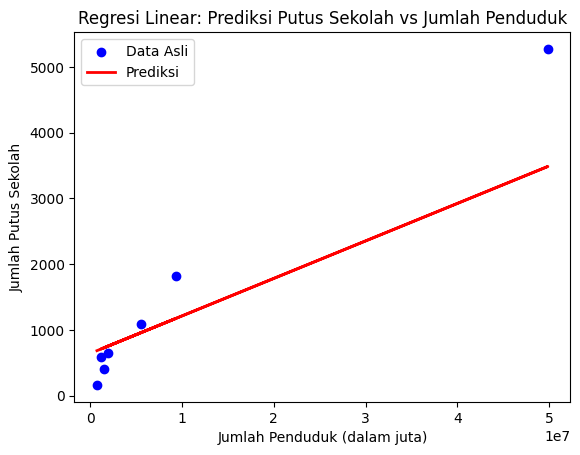

In [67]:
plt.scatter(X_test, y_test, color='blue', label='Data Asli')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediksi')
plt.xlabel("Jumlah Penduduk (dalam juta)")
plt.ylabel("Jumlah Putus Sekolah")
plt.title("Regresi Linear: Prediksi Putus Sekolah vs Jumlah Penduduk")
plt.legend()
plt.show()